In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

<h1>Dataset Preprocessing</h1>
<hr>
<h2> - 유사 One-Hot-Encoding 준비

<h2> - 장르별 유사 One-Hot-Encoding</h2>
<hr>발라드, 인디음악 -> 과 같이 여러개일 경우 해당하는 값에 모두 1처리하고 나중에 가중치를 다르게 매길 것이기 때문에 유사 One-Hot-
Encoding

In [2]:
flag = 1 #0:진행 / 1:파일 읽기 / 2:최종 탈출

while flag != 2:
    if flag == 1:
        print('read csv')
        global myMusic,allGenre,my_genre,all_genre,genre_ohe
        myMusic = pd.read_csv('./myMusic.csv')
        allGenre = pd.read_csv('./allGenre.csv')

        my_genre = myMusic['genre']
        all_genre = allGenre['장르']
        
        genre_ohe = [[0 for _ in range(len(all_genre))] for _ in range(len(my_genre))]
        flag = 0
    else:
        for idx,gen in enumerate(my_genre):
            l_gen = gen.split(', ')
            if len(l_gen) > 1:
                for t_gen in l_gen:
                    try : genre_ohe[idx][all_genre[all_genre == t_gen].index[0]] = 1
                    except :
                        with open('./allGenre.csv','a',encoding='utf-8') as file:
                            wText = pd.DataFrame(t_gen,columns=['장르'],index = [len(all_genre)])
                            wText.to_csv(file,header = False,encoding='utf-8')
                            print("Append New Genre : ",t_gen)
                            flag = 1
                            break
            else:
                try : genre_ohe[idx][all_genre[all_genre == gen].index[0]] = 1
                except :
                    with open('./allGenre.csv','a',encoding='utf-8') as file:
                        wText = pd.DataFrame(gen,columns=['장르'],index = [len(all_genre)])
                        wText.to_csv(file,header = False,encoding='utf-8')
                        print("Append New Genre : ",gen)
                        flag = 1
            if flag == 1 :
                break
        if flag == 0:
            flag = 2
        #     print(genre_ohe[idx],end='\t')
        print(idx,gen)
    
print(all_genre)

read csv
46 애니메이션/웹툰, J-POP
0          영어동화
1         Urban
2           트로트
3        포크/블루스
4      뉴메탈/하드코어
         ...   
115         컨트리
116          게임
117    애니메이션/웹툰
118          키즈
119        성인가요
Name: 장르, Length: 120, dtype: object


In [3]:
sumArray = np.zeros(len(genre_ohe[0]))
for i in genre_ohe:
    sumArray += np.array(i)
sumArray_myGenre = sumArray

In [4]:
my_preference = (sumArray - np.mean(sumArray,axis = 0))/ np.std(sumArray,axis = 0)
print(my_preference)

[-0.24356652 -0.24356652 -0.24356652 -0.24356652 -0.24356652 -0.24356652
  1.17069069 -0.24356652 -0.24356652 -0.24356652 -0.24356652 -0.24356652
 -0.24356652 -0.24356652 -0.24356652 -0.24356652 -0.24356652 -0.24356652
 -0.24356652 -0.24356652 -0.24356652 -0.24356652 -0.24356652 -0.24356652
 -0.24356652  0.69927162 -0.24356652 -0.24356652 -0.24356652 -0.24356652
  3.05636698  0.22785255 -0.24356652 -0.24356652 -0.24356652 -0.24356652
 -0.24356652 -0.24356652 -0.24356652 -0.24356652 -0.24356652 -0.24356652
 -0.24356652 -0.24356652 -0.24356652  3.05636698 -0.24356652 -0.24356652
 -0.24356652 -0.24356652 -0.24356652 -0.24356652 -0.24356652 -0.24356652
 -0.24356652 -0.24356652 -0.24356652 -0.24356652 -0.24356652 -0.24356652
 -0.24356652 -0.24356652 -0.24356652 -0.24356652 -0.24356652  1.17069069
 -0.24356652 -0.24356652 -0.24356652 -0.24356652 -0.24356652 -0.24356652
 -0.24356652 -0.24356652 -0.24356652  0.22785255 -0.24356652 -0.24356652
  2.58494791 -0.24356652 -0.24356652 -0.24356652 -0

In [5]:
my_preference = (sumArray - np.min(sumArray,axis = 0)) / (np.max(sumArray,axis = 0) - np.min(sumArray,axis = 0))
print(my_preference)

[0.         0.         0.         0.         0.         0.
 0.16666667 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.11111111 0.         0.         0.         0.
 0.38888889 0.05555556 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.38888889 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.16666667
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.05555556 0.         0.
 0.33333333 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         1.         0.         0.
 0.5        0.         0.         0.         0. 

In [6]:
def genre_cnt(genre):
    genre = genre.to_dict()
    new_dict = {}
    for gen in genre.values():
        try : new_dict[gen] += 1
        except : new_dict[gen] = 1
    return new_dict
    
def art_cnt(artist):
    artist = artist.to_dict()
    new_dict = {}
    for art in artist.values():
        try : new_dict[art] += 1
        except : new_dict[art] = 1
    return new_dict

my_artist = myMusic['artist']
my_artist = art_cnt(my_artist)
print(my_artist)

# artist_ohe = [[0 for _ in range(len(my_artist))]for _ in range(len(my_artist))]

# for idx,art in enumerate(my_artist):
#     artist_ohe[idx][idx] = my_artist[art]

# artist_ohe

{'러브홀릭스': 1, '럼블피쉬': 1, 'Official Hige Dandism': 1, '허각': 1, 'BIGBANG': 6, '이무진': 1, 'Aimyon': 5, '안예은': 1, '정동하': 1, 'G-DRAGON': 1, '성시경': 2, '장덕철': 3, '아이유': 2, '신지': 1, '우주소녀': 1, '유승우': 1, 'FTISLAND (FT아일랜드)': 1, '박세아': 1, '버스커 버스커': 1, '코요태': 1, '태연 (TAEYEON)': 1, '장범준': 3, '김종서': 1, '디핵 (D-Hack)': 1, 'Zion.T': 1, 'July': 1, '거미': 1, '백지영': 1, 'MSG워너비(정상동기)': 1, '경서': 1, 'Mandy Moore': 1, 'Every Little Thing': 1}


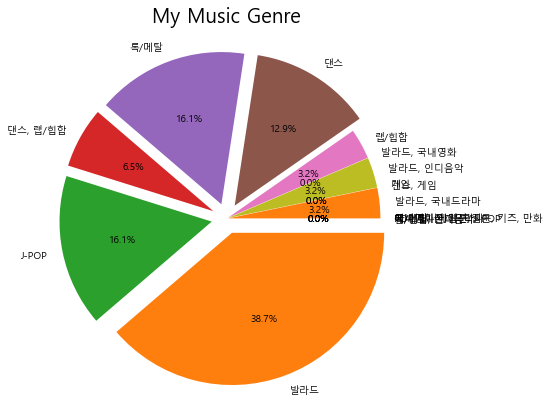

In [7]:
plt.rcParams['font.family'] = "Malgun Gothic"
plt.figure(figsize = (7,7))
genreCnt = {}

for g in myMusic['genre']:
    try : genreCnt[g] += 1
    except : genreCnt[g] = 0
      
    
labels = list(genreCnt.keys())
ratio = list(genreCnt.values())
explode = [ratio[i] * 0.01 for i in range(len(labels))]
for i,v in enumerate(explode):
    if v >= np.mean(ratio)*0.01:
        explode[i] = 0.1

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=0, counterclock=False, explode = explode)
plt.title('My Music Genre',fontsize = 20)
plt.show()

<h1>cor DayChart</h1>

In [8]:
if 'DayChart' in os.listdir():
    try:
        global dayList
        dayChart = os.listdir('DayChart')
        print(dayChart[1:])
        
        #사용자로부터 파일 날짜 입력 받기
        input_dayChart = input("원하는 날짜 입력 (ex:20210720): ")
        match = re.search(r'\d{4}\d{2}\d{2}', input_dayChart)
        date = datetime.strptime(match.group(), '%Y%m%d').date()
        year = '{:=04}'.format(date.year)
        month = '{:=02}'.format(date.month)
        day = '{:=02}'.format(date.day)
        
        dayListF = year+month+day+'.csv'
        dayList = pd.read_csv('./DayChart/'+dayListF)
        
        print(dayList)

    except Exception as e:
        print(e)
else:
    pass

['20210720.csv', '20210722.csv', '20210723.csv', '20210724.csv', '20210728.csv']
원하는 날짜 입력 (ex:20210720): 20210728
     no                        title         artist      genre    good
0     1                       바라만 본다  MSG워너비(M.O.M)        발라드  126116
1     2                   Next Level          aespa         댄스  175989
2     3                          신호등            이무진       록/메탈  137453
3     4          Permission to Dance          방탄소년단         댄스  140102
4     5                       Butter          방탄소년단         댄스  229817
..  ...                          ...            ...        ...     ...
95   96                추적이는 여름 비가 되어            장범준  발라드, 록/메탈   24878
96   97         Way Back Home (2021)             런치     일렉트로니카   14984
97   98             이렇게 좋아해 본 적이 없어요    CHEEZE (치즈)  발라드, 인디음악   49810
98   99                           취미            박재정        발라드    6758
99  100  너의 발걸음에 빛을 비춰줄게 (Prod. 조영수)    케이시 (Kassy)        발라드   29244

[100 rows x 5 columns]


In [9]:
flag = 1 #0:진행 / 1:파일 읽기 / 2:최종 탈출
dayListGenre = dayList['genre']
while flag != 2:
    if flag == 1:
        print('read csv')
        global myMusic,allGenre,my_genre,all_genre,genre_ohe
        myMusic = pd.read_csv('./myMusic.csv')
        allGenre = pd.read_csv('./allGenre.csv')

        my_genre = myMusic['genre']
        all_genre = allGenre['장르']
        
        genre_ohe = [[0 for _ in range(len(all_genre))] for _ in range(len(dayListGenre))]
        flag = 0
    else:
        for idx,gen in enumerate(dayListGenre):
            l_gen = gen.split(', ')
            if len(l_gen) > 1:
                for t_gen in l_gen:
                    try : genre_ohe[idx][all_genre[all_genre == t_gen].index[0]] = 1
                    except :
                        with open('./allGenre.csv','a',encoding='utf-8') as file:
                            wText = pd.DataFrame(t_gen,columns=['장르'],index = [len(all_genre)])
                            wText.to_csv(file,header = False,encoding='utf-8')
                            print("Append New Genre : ",t_gen)
                            flag = 1
                            break
            else:
                try : genre_ohe[idx][all_genre[all_genre == gen].index[0]] = 1
                except :
                    with open('./allGenre.csv','a',encoding='utf-8') as file:
                        wText = pd.DataFrame(gen,columns=['장르'],index = [len(all_genre)])
                        wText.to_csv(file,header = False,encoding='utf-8')
                        print("Append New Genre : ",gen)
                        flag = 1
            if flag == 1 :
                break
        if flag == 0:
            flag = 2
        #     print(genre_ohe[idx],end='\t')
#         print(idx,gen)
    
# print(all_genre)

sumArray = np.zeros(len(genre_ohe[0]))
for i in genre_ohe:
    sumArray += np.array(i)
sumArray_dayListGenre = sumArray
sumArray_dayListGenre

read csv


array([ 0.,  0.,  0.,  4.,  0.,  0.,  7.,  0.,  0.,  0.,  0.,  0., 23.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0., 20.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,
        9.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  0.,  0.,
       14.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0., 44.,  0.,  0., 35.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.])

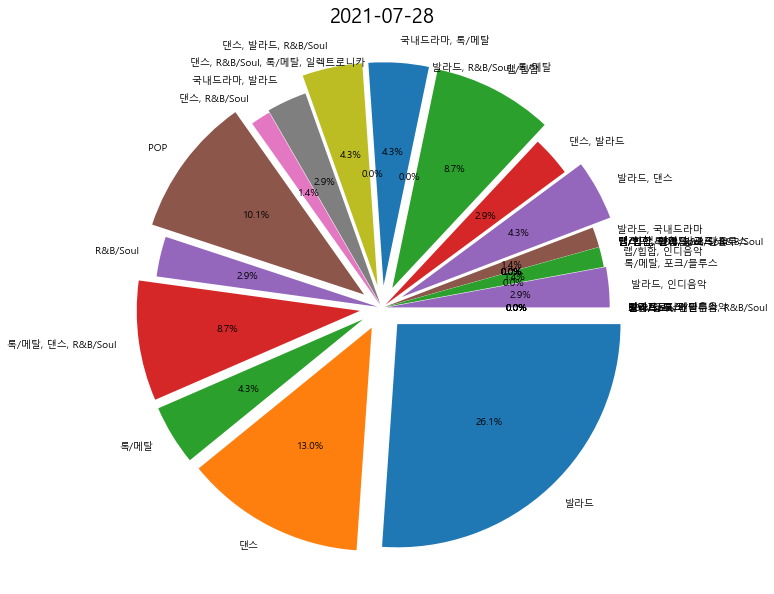

In [10]:
plt.rcParams['font.family'] = "Malgun Gothic"
plt.figure(figsize = (10,15))
genreCnt = {}

for g in dayListGenre:
    try : genreCnt[g] += 1
    except : genreCnt[g] = 0
      
labels = list(genreCnt.keys())
ratio = list(genreCnt.values())
explode = [ratio[i] * 0.01 for i in range(len(labels))]
for i,v in enumerate(explode):
    if v >= np.mean(ratio)*0.01:
        explode[i] = 0.1

#제목        
day_title = []
for i,t in enumerate(input_dayChart):
    if i == 4 or i == 6:
        day_title.append('-')
    day_title.append(t)
day_title = "".join(day_title)        
        
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=0, counterclock=False, explode = explode)
plt.title(day_title,fontsize=20)
plt.show()

<h1>DayList 장르 개수</h1>

In [11]:
dayListGenreCnt = genre_cnt(dayListGenre)
dayListGenreCnt
columns = list(all_genre.values)
dayListGenreCnt = pd.DataFrame(dayListGenreCnt,columns=columns,index=['장르']).dropna(axis=1)
dayListGenreCnt = dayListGenreCnt.T
dayListGenreCnt

,장르
R&B/Soul,3
록/메탈,4
일렉트로니카,1
POP,8
랩/힙합,7
발라드,19
댄스,10
성인가요,1


In [12]:
myGenreCnt = genre_cnt(my_genre)
print(myGenreCnt)
columns = list(all_genre.values)
myGenreCnt = pd.DataFrame(myGenreCnt,columns=columns,index=['장르']).dropna(axis = 1)
myGenreCnt = myGenreCnt.T
myGenreCnt

{'국내영화': 1, '발라드': 13, 'J-POP': 6, '댄스, 랩/힙합': 3, '록/메탈': 6, '댄스': 5, '랩/힙합': 2, '발라드, 국내영화': 1, '발라드, 인디음악': 2, '댄스, 게임': 1, '게임': 1, '발라드, 국내드라마': 2, '랩/힙합, 인디음악': 1, '록/메탈, 국내드라마': 1, 'POP, 애니메이션/웹툰, 키즈, 만화': 1, '애니메이션/웹툰, J-POP': 1}


,장르
국내영화,1
록/메탈,6
J-POP,6
랩/힙합,2
발라드,13
댄스,5
게임,1


<h1>DayChart 100위 권 중 내가 들은 장르와의 겹치는 정도</h1>

In [13]:
corrGenre = pd.DataFrame(round(myGenreCnt/dayListGenreCnt,2))
corrGenre = corrGenre.dropna(axis = 0)
corrGenre = corrGenre.sort_values(by=['장르'],ascending = False)
corrGenre

,장르
록/메탈,1.50
발라드,0.68
댄스,0.50
랩/힙합,0.29


<h1>DayChart 100위 권 중 내가 들은 노래와 겹치는 장르의 노래</h1>
<br><hr>좋아요 순 정렬

In [14]:
dayRecommandGenre = pd.DataFrame()
for genreKeys in list(corrGenre.index):
    res = pd.DataFrame(dayList[dayList['genre'] == genreKeys])
    dayRecommandGenre = pd.concat([dayRecommandGenre,res])
    dayRecommandGenre.sort_values(by = 'good',ascending = False,inplace = True)
    
dayRecommandGenre.drop('no',axis=1,inplace = True)
dayRecommandGenre.reset_index(drop=True,inplace=True)
dayRecommandGenre.rename_axis('no',inplace = True)
dayRecommandGenre

,title,artist,genre,good
no,,,,
0,Dynamite,방탄소년단,댄스,418938
1,에잇(Prod.&Feat. SUGA of BTS),아이유,록/메탈,363591
2,Blueming,아이유,록/메탈,313247
3,METEOR,창모 (CHANGMO),랩/힙합,266612
4,Butter,방탄소년단,댄스,229817
5,취기를 빌려 (취향저격 그녀 X 산들),산들,발라드,196264
6,VVS (Feat. JUSTHIS) (Prod. GroovyRoom),미란이 (Mirani),랩/힙합,187624
7,늦은 밤 너의 집 앞 골목길에서,노을,발라드,183861
8,How You Like That,BLACKPINK,댄스,181669


In [15]:
dayRecommandGenre.describe()

,good
count,40.000000
mean,117855.425000
std,97020.651631
min,6758.000000
25%,40993.750000
50%,97862.500000
75%,162672.000000
max,418938.000000
